<a href="https://colab.research.google.com/github/yashvidas/Canteen-management_website/blob/master/Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 0: COVID-19 Outbreak Analysis

### Overview

In a tweet on 11 March 2020, WHO declared COVID-19 (or coronavirus) a pandemic. A pandemic is a disease spread over the world.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/who-coronavirus-pandemic.png' width=500>

Here's a link to the tweet: https://twitter.com/WHO/status/1237777021742338049

Coronavirus has claimed the lives of more than **300 thousand** (or 3 lakh) people globally so far and is still counting. You can look at the live dashboard to see the real-time updates.

[COVID-19 Live Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

In line with this pandemic, in this class, to understand the virality of the disease, we are going to look at 

- How many people get affected by coronavirus every day?

- What is the distribution of the number of people affected across the globe?

- Which countries have flattened the curve? In other words, which countries have controlled the rate of spread of COVID-19?

---

### What Will You Create In This Class?

- Cartograms using Folium Maps 

- Line Plots

- Bivariate Bar Charts


---

### Teacher-Student Activities

Now, let's create the required line plots and cartograms. Here's the list of activities that we are going to perform in this class:

1. Download the required data

2. Locate the datasets in the notebook

3. Import the required modules

4. Create DataFrames

5. Create Pandas series

6. Create line plots/charts

7. Create maps

8. Create bar charts

---

#### Activity 1: Download The Datasets

Here's the link to the data source. It is a GitHub repository. Coders/programmers across the world create GitHub repositories for their codes so that they can download and upload their work anytime from anywhere. Essentially, it's like carrying data in a portable storage device.

[COVID-19 Data Source](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)


<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/github-covid19-repo.png'>

In [ ]:
# Student Action: Run the code below by either clicking on the play button or by hitting the 'shift + enter' keys together.
# Cloning the GitHub repository.
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 365870, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 365870 (delta 11), reused 31 (delta 10), pack-reused 365836
Receiving objects: 100% (365870/365870), 4.53 GiB | 13.76 MiB/s, done.
Resolving deltas: 100% (301753/301753), done.
Checking out files: 100% (1836/1836), done.


The repository is saved in the notebook. You can click on the folder icon on the left-hand side of the notebook to access the `COVID-19` repository (or folder).

---

#### Activity 2: Dataset Paths

To get the path of the datasets:

1. Click on the folder icon on the left-hand side of the notebook.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_1.png' width=700>

2. Click on the tiny arrow on the left-hand side of the `COVID-19` folder.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_2.png' width=400>

3. Click on the tiny arrow in the left-hand side of the `csse_covid_19_data` folder.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_3.png' width=400>

4. Click on the tiny arrow in the left-hand side of the `csse_covid_19_time_series` folder.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_4.png' width=400>

   You should be able to see the CSV files which contain data for this class.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_5.png' width=400>

5. Right-click on each of the CSV files and then click on the **Copy path** option. The path of the file will get copied.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_6.png' width=500>

6. You can now paste the link either in a code cell or in a text cell.

**Note:**

The files below are no longer available:

1. `time_series_19-covid-Confirmed.csv`

2. `time_series_19-covid-Deaths.csv`

3. `time_series_19-covid-Recovered.csv`

Hence, refer to the following two files for the latest time-series data:

1. `time_series_covid19_confirmed_global.csv`

2. `time_series_covid19_deaths_global.csv`

3. `time_series_covid19_recovered_global.csv`

In [ ]:
# Student Action: Run the code below.
# Storing the path of 'time_series_covid19_confirmed_global.csv'' in 'conf_csv' variable.
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# Storing the path of 'time_series_covid19_deaths_global.csv'' in 'deaths_csv' variable.
deaths_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# Storing the path of 'time_series_covid19_recovered_global.csv' in 'rec_csv' variable.
rec_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

This data gets updated every day. Today it has data till yesterday. Tomorrow, it will contain data for this day as well.

---

#### Activity 3: Importing Modules

To perform different kinds of tasks, we can use different modules in Python. 

In [ ]:
# Student Action: Run the code below.
import pandas as pd # Data processing 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import folium # Cartograms / maps
import datetime # Work with date and time values

%matplotlib inline

---

#### Activity 4: Create DataFrames & Series

Let's create a DataFrames for the total confirmed coronavirus cases across the globe. 

*A DataFrame is a tabular representation of data containing many rows and columns.*


In [ ]:
# Student Action: Run the code below.
# DataFrame for the total confirmed cases.
conf_df = pd.read_csv(conf_csv)
# Display the first five rows of the 'conf_df' DataFrame.
conf_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/5/22  5/6/22  5/7/22  5/8/22  \
0        0        0        0        0  ...  178905  178919  178922  178981   
1        0        0        0        0  ...  275266  275310  275341  275366   
2        0        0        0        0  ...  265786  265791  265794  265798   
3        0        0        0        0  ...   41717   41717   41717   41717   
4        0        0        0        0  ...   99287   99287   99287   99287   

   5/9/22  5/10/22  5/11/22  5/12/22  5/13/22  5/14/22  
0  179010   179017   179131   179169   179203   179242  
1  275372   275416   275440   275485   275534   275574  
2  265800   265804   265806   265808   265814   265816  
3   41717    41717    41717    42156    42156    42156  
4   99287    99287    99287    99287    99287    99287  

[5 rows x 848 columns]

As you can see, we have data for the total confirmed cases of coronavirus reported till yesterday across the globe.

Let's find out how many rows and columns are there in the `conf_df` DataFrame.

In [ ]:
# Student Action: Run the code below.
# Number of rows and columns in the 'conf_df' DataFrame.
conf_df.shape

(285, 848)

Now, let's create a series of the total confirmed cases of coronavirus reported:

- Across globe

- In China

- In India

- In the US

In [1]:
# Student Action: Run the code below.
# Total confirmed cases reported across the globe.
global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
# Converting the indices to datetime values.
global_cases.index = pd.to_datetime(global_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.
global_cases

NameError: ignored

In [ ]:
# Student Action: Run the code below.
# Total confirmed cases in China.
china_cases = conf_df[conf_df['Country/Region'] == 'China'].iloc[:, 4:].apply(sum, axis=0)
china_cases.index = pd.to_datetime(china_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.

# Total confirmed cases in India.
india_cases = conf_df[conf_df['Country/Region'] == 'India'].iloc[:, 4:].apply(sum, axis=0)
india_cases.index = pd.to_datetime(india_cases.index)

# Total confirmed cases in the US.
us_cases = conf_df[conf_df['Country/Region'] == 'US'].iloc[:, 4:].apply(sum, axis=0)
us_cases.index = pd.to_datetime(us_cases.index)
india_cases

2020-01-22           0
2020-01-23           0
2020-01-24           0
2020-01-25           0
2020-01-26           0
                ...   
2022-05-10    43110586
2022-05-11    43113413
2022-05-12    43116254
2022-05-13    43119112
2022-05-14    43121599
Length: 844, dtype: int64

---

#### Activity 5: Line Plots

Now, we will create line plots for the total number of confirmed cases reported 

- Across world

- In China

- In India

- In the US


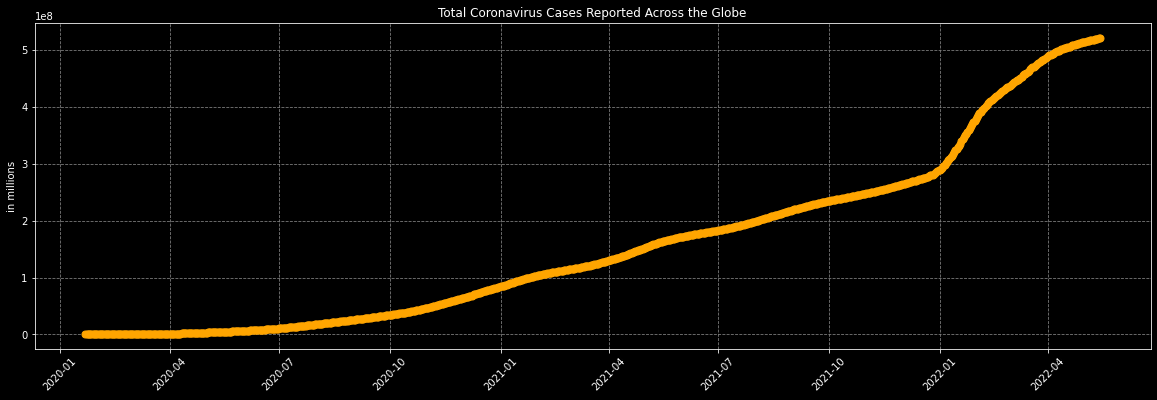

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported across the world.
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported Across the Globe')
plt.plot(global_cases.index, global_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('in millions')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

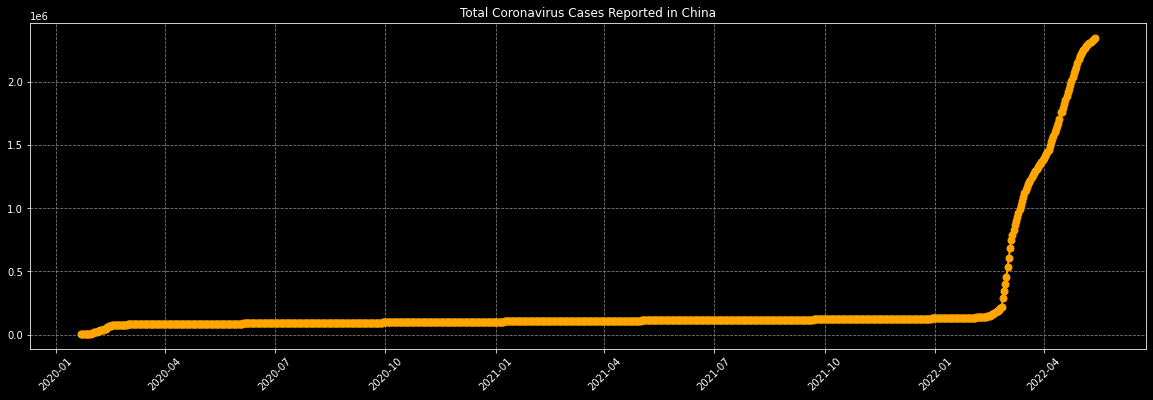

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in China only.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in China')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

The curve flattens after 23 February 2020 because Wuhan (the capital of Hubei province in China) was put under total lockdown on 23 January 2020. As a result, the spread of the virus slowed down significantly.

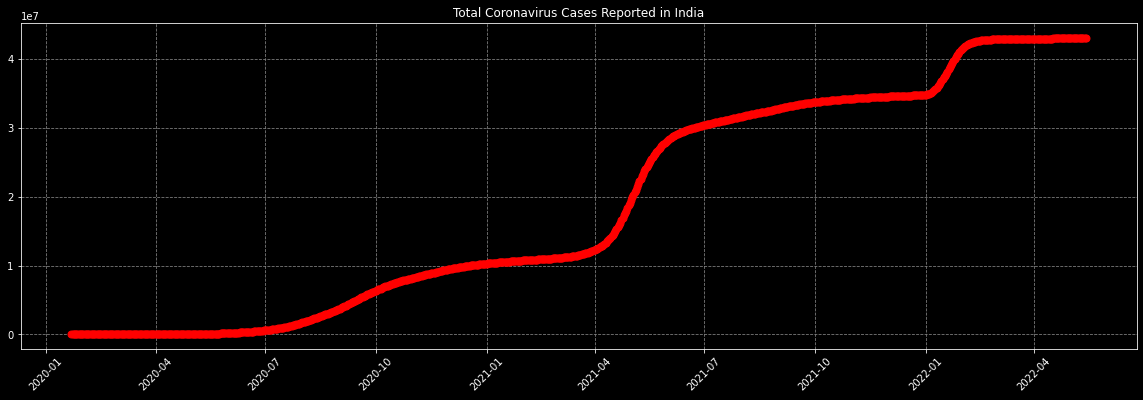

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in India.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in India')
plt.plot(india_cases.index, india_cases, c='r', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

India started testing for coronavirus in bulk in the last week of March 2020.

If you want to look at the trend of the coronavirus outbreak in India across all the states, then click on the link provided below.

[Ministry Of Health & Family Welfare](https://www.mohfw.gov.in/)

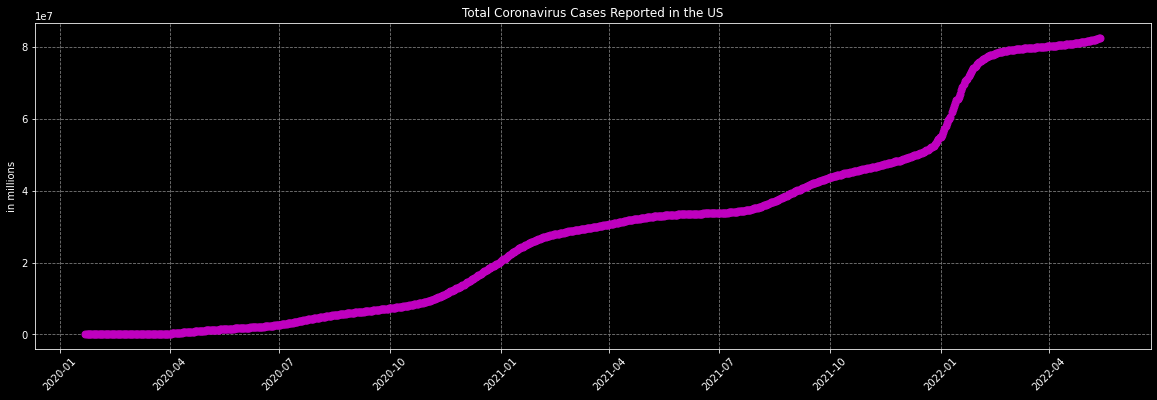

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in the US.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in the US')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel("in millions")
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

The USA started testing for coronavirus in bulk after March 15, 2020.

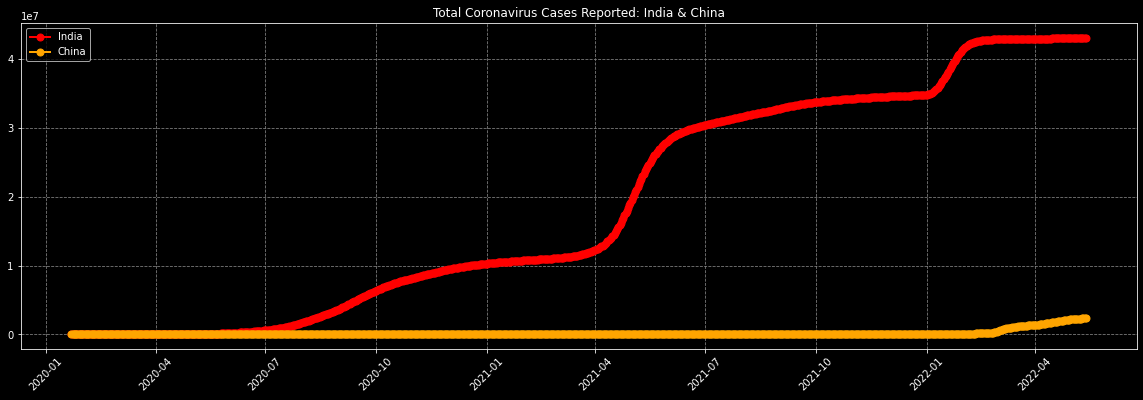

In [ ]:
# Student Action: Run the code below.
# Line plot to compare the total number of coronavirus confirmed cases reported in India and China.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported: India & China')
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o', markersize=7, label='India')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7, label='China')
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.legend()
plt.show()

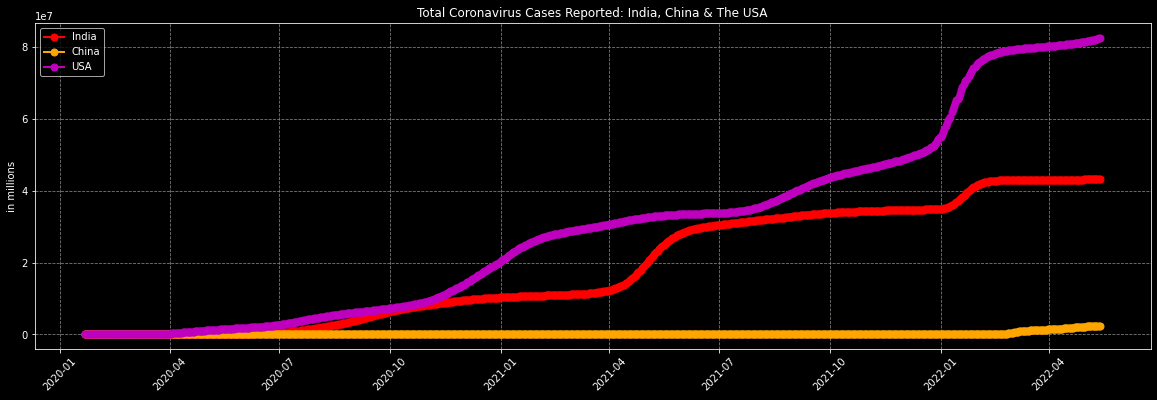

In [ ]:
# Student Action: Run the code below.
# Line plot to compare the total number of coronavirus confirmed cases reported in India, China & the USA.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported: India, China & The USA')
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o', markersize=7, label='India')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7, label='China')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7, label='USA')
plt.xticks(rotation=45)
plt.ylabel('in millions')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.legend()
plt.show()

At the beginning of the last week of March, the total confirmed cases of coronavirus in the USA surpassed the same in China.

---

#### Activity 6: Grouping

Let's identify the top 5 countries having the most number of confirmed coronavirus cases and visualise their trends starting from March 15, 2020 because that's when the USA started testing in bulk. They have recorded the most number of coronavirus confirmed cases till date.

In [ ]:
# Student Action: Run the code below.
# The grouped DataFrame having the total coronavirus confirmed cases across the globe in descending order.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)
desc_grp_conf_df.head()

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
183             US  40.000000 -100.000000        1        1        2        2   
80           India  20.593684   78.962880        0        0        0        0   
24          Brazil -14.235000  -51.925300        0        0        0        0   
63          France  77.103595 -118.075614        0        0        2        3   
67         Germany  51.165691   10.451526        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...    5/4/22    5/5/22    5/6/22    5/7/22  \
183        5        5        5  ...  81620724  81707852  81831608  81858498   
80         0        0        0  ...  43091393  43094938  43098743  43102194   
24         0        0        0  ...  30502501  30524183  30543908  30558530   
63         3        3        4  ...  28996577  29040934  29081169  29119127   
67         0        1        4  ...  25130137  25215210  25287462  25295950   

       5/8/22    5/9/22   5/10/22   5/11/22   5/12/22   5/13/22  
183  81863479  81973661  82059839  82223174  82325687  82421624  
80   43105401  43107689  43110586  43113413  43116254  43119112  
24   30564536  30574245  30594388  30617786  30639130  30664739  
63   29148451  29155815  29212276  29252875  29289023  29321831  
67   25299300  25406868  25503878  25592839  25661838  25723697  

[5 rows x 846 columns]

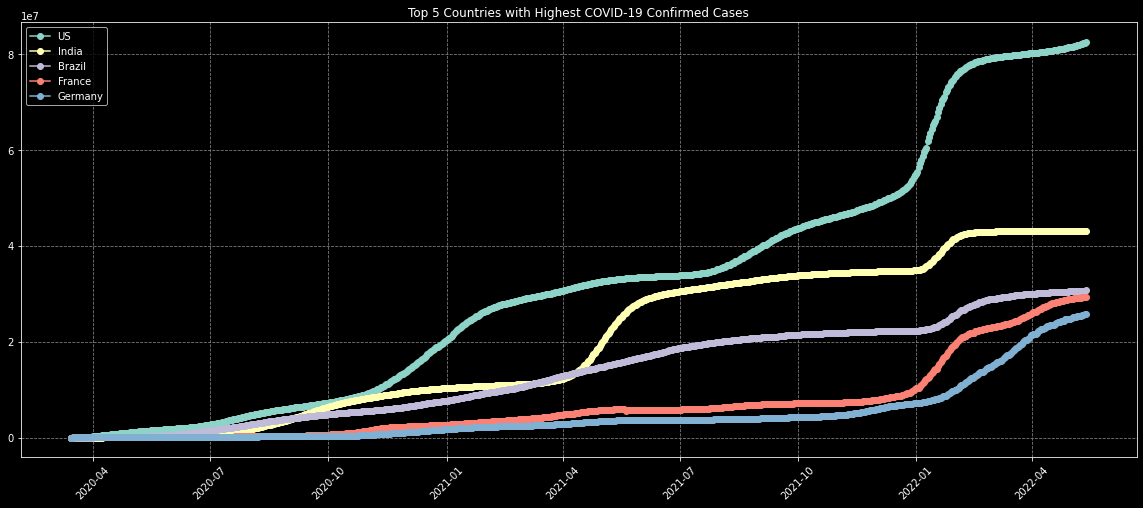

In [ ]:
# Student Action: Run the code below.
# Top 5 countries with the highest number of coronavirus confirmed cases starting from March 15, 2020.
plt.figure(figsize=(20, 8))
plt.title('Top 5 Countries with Highest COVID-19 Confirmed Cases')
for region in desc_grp_conf_df.head()['Country/Region']:
  # conf_series = high_to_low_conf_df.loc[high_to_low_conf_df['Country/Region'] == region, high_to_low_conf_df.columns[3:]].values[0]
  plt.plot(global_cases.index[53:], desc_grp_conf_df[desc_grp_conf_df['Country/Region'] == region].iloc[0, 56:], '-o', label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

---

#### Activity 7: Bivariate Bar Plots

Let's create a bar chart displaying the top 20 countries having the most number of coronavirus confirmed cases. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


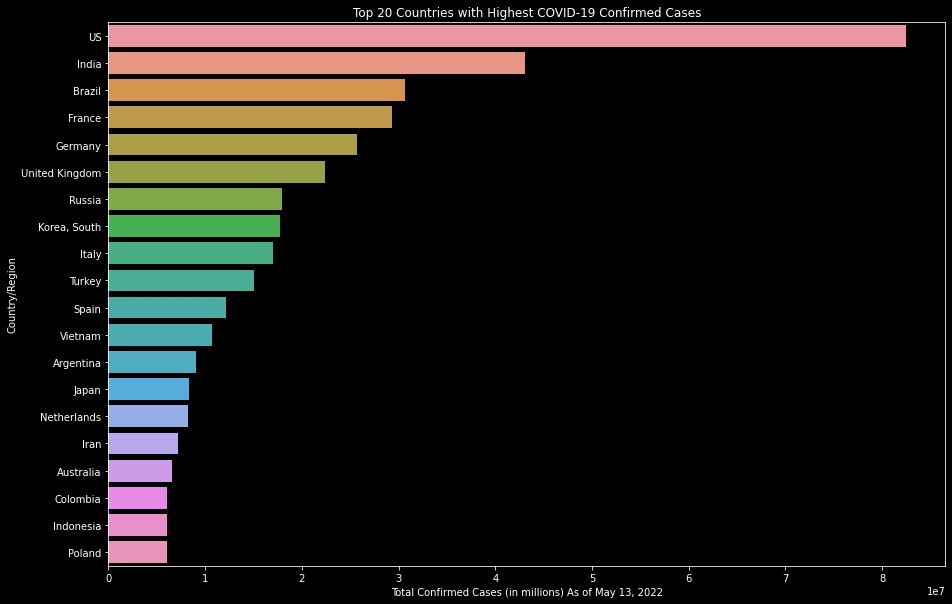

In [ ]:
# Student Action: Run the code below.
# Get the latest date.
last_col = conf_df.columns[-1]
# Modify the latest date in the 'Month DD, YYYY' format.
latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y')

# Create a bivariate bar chart displaying the top 20 countries having the most number of coronavirus confirmed cases.
plt.figure(figsize=(15, 10))
plt.title('Top 20 Countries with Highest COVID-19 Confirmed Cases')
sns.barplot(desc_grp_conf_df[last_col].head(20), desc_grp_conf_df['Country/Region'].head(20), orient='h')
plt.xlabel(f'Total Confirmed Cases (in millions) As of {latest_date}')
plt.show()

---

#### Activity 8: Cartograms (or Maps) For China^

Let's create a cartogram to show the distribution of confirmed coronavirus cases in China and mark the affected regions of China with location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [ ]:
# Student Action: Run the code below.
# The DataFrame for the total confirmed cases in China only.
conf_china_df = conf_df[conf_df['Country/Region'] == 'China']

# Map to show the distribution of confirmed coronavirus cases in China (regular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.25)
for i in conf_china_df.index:
  folium.Marker(location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col])).add_to(china_map)
china_map

ValueError: ignored

Let's create a cartogram to show the distribution of confirmed coronavirus cases in China and mark the affected regions of China with **circular** location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases in China (circular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.index:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 2,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

ValueError: ignored

We know for sure that the Hubei region was affected the most in China; almost 50 times the second most affected region. Hence, the circles for the other regions are very small compared to the circle for the Hubei region.

Let's increase the scale of the radius of the circles to see the variation of people affected in other regions. Also, we will not create a circle for the Hubei region on the map. 

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases in China excluding Wuhan (circular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='100%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.sort_values(by=last_col, ascending=False).index[1:]:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 100,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

ValueError: ignored

As you can see, the number of reported cases of coronavirus are comparable in regions other than Hubei.

---

#### Activity 9: Cartogram (or Maps) For World

Let's create a cartogram to show the distribution of confirmed coronavirus cases across the world and mark the affected regions in the world with **circular** location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases across the world (circular markers).
world_map = folium.Map(location=[0, 0], width='100%', height='80%', tiles='Stamen Toner', zoom_start=2.25)
for i in conf_df.index:
  folium.Circle(location=[conf_df.loc[i, 'Lat'], conf_df.loc[i, 'Long']], 
                radius=int(conf_df.loc[i, last_col]), 
                popup=conf_df.loc[i, 'Country/Region'] + '\n' + str(conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(world_map)
world_map

ValueError: ignored

---

#### Activity 10: Cartogram (or Maps) For The USA

Let's also create a cartogram specifically for the United States for America.

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases across the USA (circular markers).
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()

us_map = folium.Map(location=[39.381266, -97.922211], width='100%', height='80%', tiles='Stamen Toner', zoom_start=4)
for i in us_conf_df.index:
  folium.Circle(location=[us_conf_df.loc[i, 'Lat'], us_conf_df.loc[i, 'Long_']], 
                radius=int(us_conf_df.loc[i, last_col]), 
                popup=us_conf_df.loc[i, 'Province_State'] + '\n' + str(us_conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(us_map)
us_map

Most number of the confirmed cases are recorded in the eastern region in the USA. Also, New York is the most affected city in the USA.

---

#### Activity 11: Non-Cumulative Confirmed Cases^^^

Let's identify the countries having the lowest number of daily or non-cumulative coronavirus confirmed cases to further identify the countries that have flattened the curve.

**Q:** What should be the logic to identify the countries that have flattened the curve?

**A:** 

**Q:** What should be the logic to calculate the non-cumulative confirmed coronavirus cases starting from January 22, 2020?

**A:** 

Let's create a DataFrame to find out the non-cumulative confirmed coronavirus cases starting from January 22, 2020.

In [ ]:
# Student Action: Run the code below.
# First step to create the DataFrame for the non-cumulative confirmed coronavirus cases starting from January 22, 2020.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]
non_cum_conf_df

Country/Region        Lat        Long  1/22/20
183                US  40.000000 -100.000000        1
80              India  20.593684   78.962880        0
24             Brazil -14.235000  -51.925300        0
63             France  77.103595 -118.075614        0
67            Germany  51.165691   10.451526        0
..                ...        ...         ...      ...
76           Holy See  41.902900   12.453400        0
113  Marshall Islands   7.131500  171.184500        0
5          Antarctica -71.949900   23.347000        0
106        MS Zaandam   0.000000    0.000000        0
117        Micronesia   7.425600  150.550800        0

[198 rows x 4 columns]

In [ ]:
# Student Action: Run the code below.
# Final step to create the DataFrame for the non-cumulative confirmed coronavirus cases starting from January 22, 2020.
for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
  series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
  non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series 

non_cum_conf_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
183             US  40.000000 -100.000000        1        0        1        0   
80           India  20.593684   78.962880        0        0        0        0   
24          Brazil -14.235000  -51.925300        0        0        0        0   
63          France  77.103595 -118.075614        0        0        2        1   
67         Germany  51.165691   10.451526        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  5/4/22  5/5/22  5/6/22  5/7/22  5/8/22  \
183        3        0        0  ...  114107   87128  123756   26890    4981   
80         0        0        0  ...    3275    3545    3805    3451    3207   
24         0        0        0  ...   20072   21682   19725   14622    6006   
63         0        0        1  ...   48080   44357   40235   37958   29324   
67         0        1        3  ...   96167   85073   72252    8488    3350   

     5/9/22  5/10/22  5/11/22  5/12/22  5/13/22  
183  110182    86178   163335   102513    95937  
80     2288     2897     2827     2841     2858  
24     9709    20143    23398    21344    25609  
63     7364    56461    40599    36148    32808  
67   107568    97010    88961    68999    61859  

[5 rows x 846 columns]

Let's create plots for a few countries to visualise the trends for the non-cumulative confirmed cases.

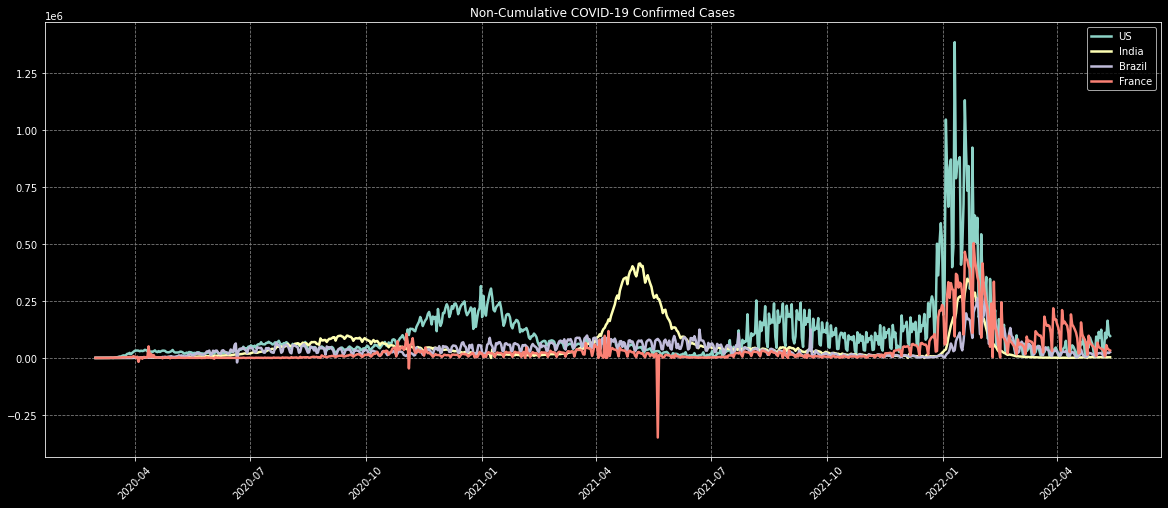

In [ ]:
# Student Action: Run the code below.
# Plot the first four countries having non-cumulative confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 8))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[:4, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

**Q:** From the above graph, identify the countries having the lowest daily confirmed cases?

**A:**

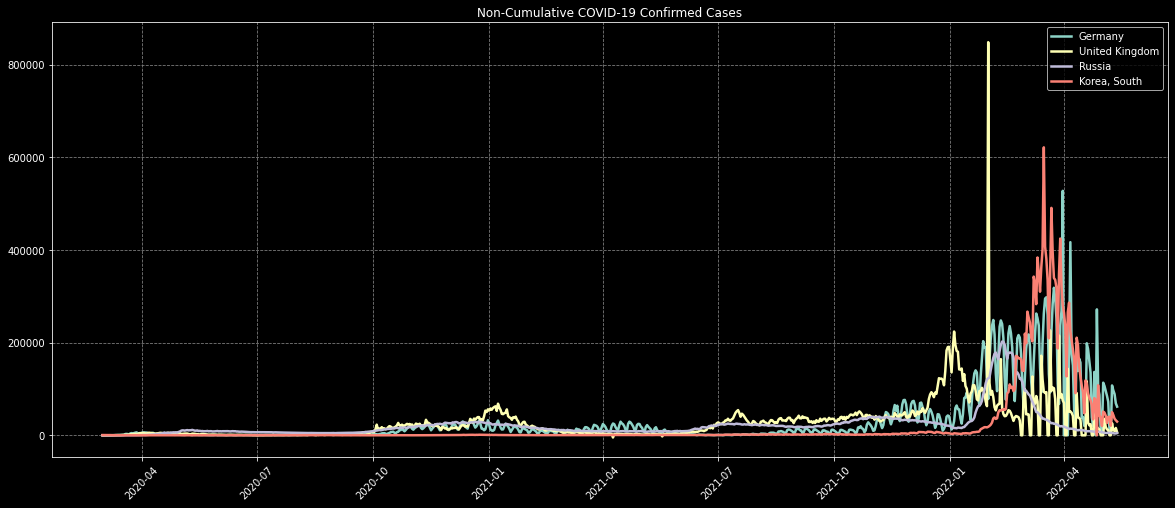

In [ ]:
# Student Action: Run the code below.
# Plot the next four countries having non-cumulative confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 8))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[4:8, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

**Q:** From the above graph, identify the countries having the lowest daily confirmed cases?

**A:**

---

#### Activity 12: Flattened Curves^^

Let's create a list of countries that have flattened the curve. Ideally, to flatten the curve, the non-cumulative cases for each day should be 0. But in a practical sense, from the point-of-view of healthcare facilities in a country, let's assume that on an average a country can handle 100 COVID-19 cases every day.

So, to find the countries that have flattened the curve, let's calculate the sum of daily coronavirus confirmed cases for each country. If the sum of daily coronavirus confirmed cases for the last 14 days is at most 1400, then we can say that the country has flattened the curve. 

In [ ]:
# Student Action: Run the code below.
# List of countries that have flattened the curve.
countries = []
for i in non_cum_conf_df.index:
  last_14_days = []
  for j in range(14):
    last_14_days.append(non_cum_conf_df.loc[i, non_cum_conf_df.columns[-(j + 1)]])
  if sum(last_14_days) <= 1400:
    countries.append(non_cum_conf_df.loc[i, 'Country/Region'])
countries

['Ukraine',
 'Iraq',
 'Bangladesh',
 'Jordan',
 'Georgia',
 'Pakistan',
 'Kazakhstan',
 'Morocco',
 'Lebanon',
 'Tunisia',
 'Nepal',
 'Bolivia',
 'Azerbaijan',
 'Sri Lanka',
 'West Bank and Gaza',
 'Paraguay',
 'Kuwait',
 'Burma',
 'Dominican Republic',
 'Venezuela',
 'Moldova',
 'Egypt',
 'Libya',
 'Ethiopia',
 'Honduras',
 'Armenia',
 'Oman',
 'Bosnia and Herzegovina',
 'Qatar',
 'Kenya',
 'Zambia',
 'North Macedonia',
 'Botswana',
 'Albania',
 'Algeria',
 'Nigeria',
 'Zimbabwe',
 'Uzbekistan',
 'Montenegro',
 'Kosovo',
 'Mozambique',
 'Kyrgyzstan',
 'Iceland',
 'Maldives',
 'Afghanistan',
 'Uganda',
 'El Salvador',
 'Ghana',
 'Namibia',
 'Cambodia',
 'Rwanda',
 'Cameroon',
 'Angola',
 'Congo (Kinshasa)',
 'Senegal',
 'Malawi',
 "Cote d'Ivoire",
 'Suriname',
 'Eswatini',
 'Fiji',
 'Madagascar',
 'Guyana',
 'Sudan',
 'Bhutan',
 'Mauritania',
 'Belize',
 'Cabo Verde',
 'Syria',
 'Gabon',
 'Papua New Guinea',
 'Seychelles',
 'Andorra',
 'Burundi',
 'Togo',
 'Guinea',
 'Bahamas',
 'Lesot

Let's create line plots to visualise the total confirmed cases for the first 10 countries in the above list.

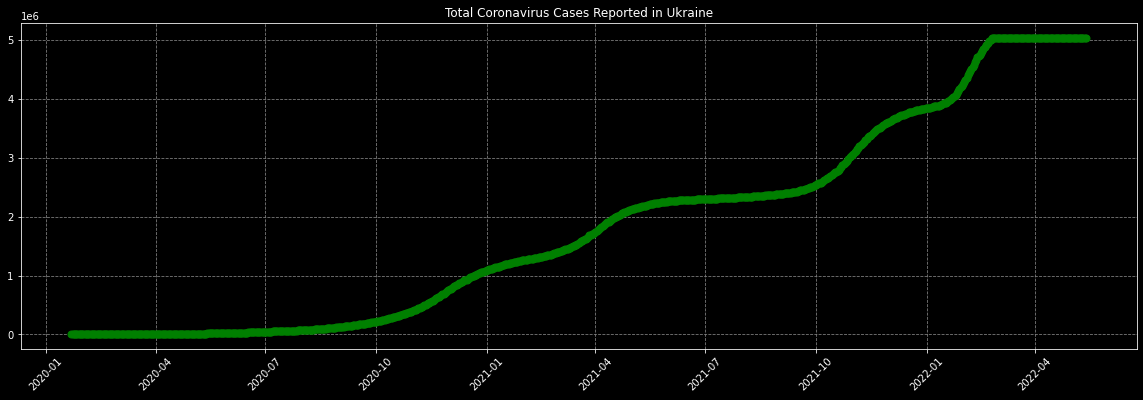

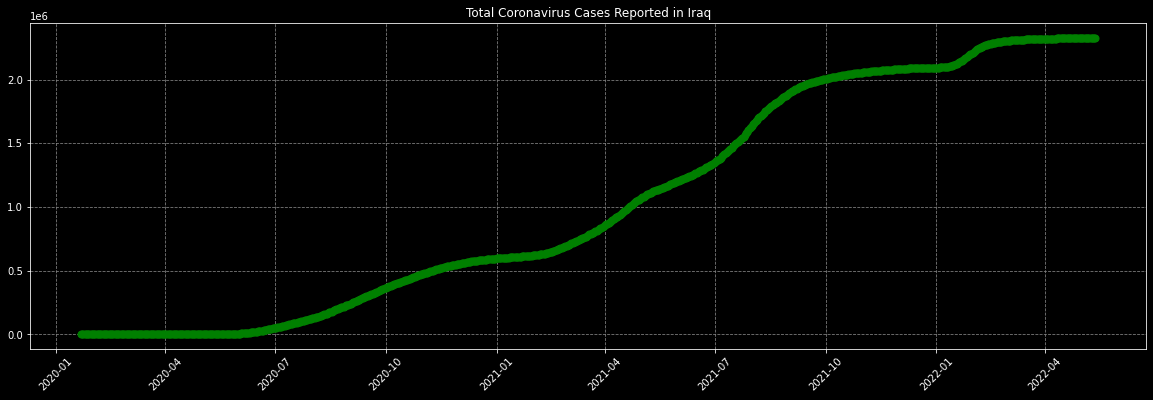

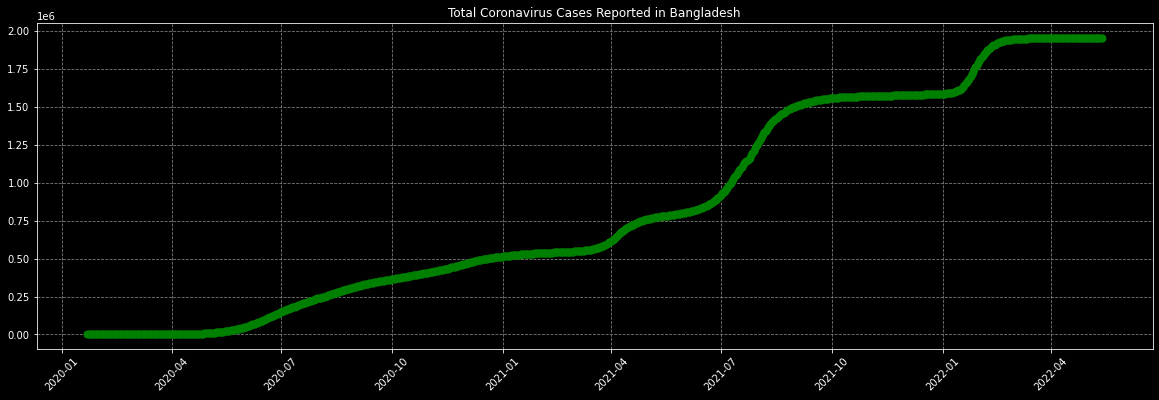

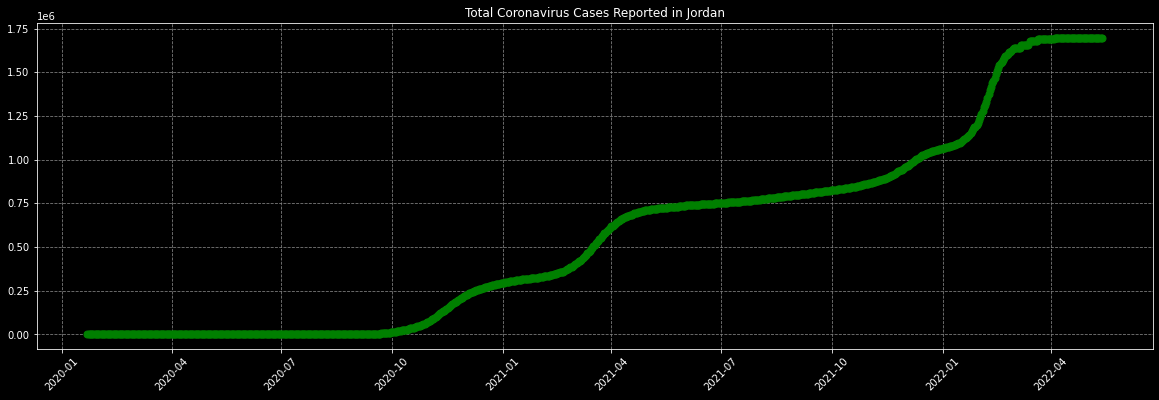

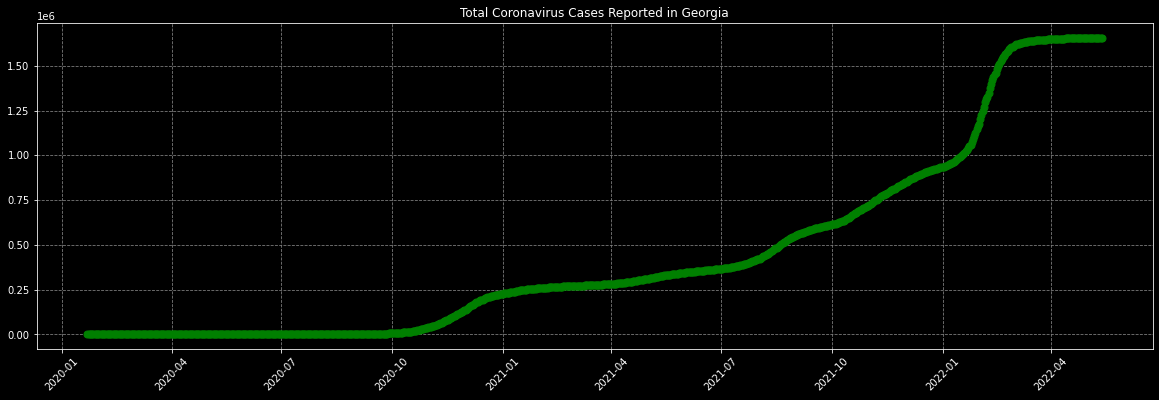

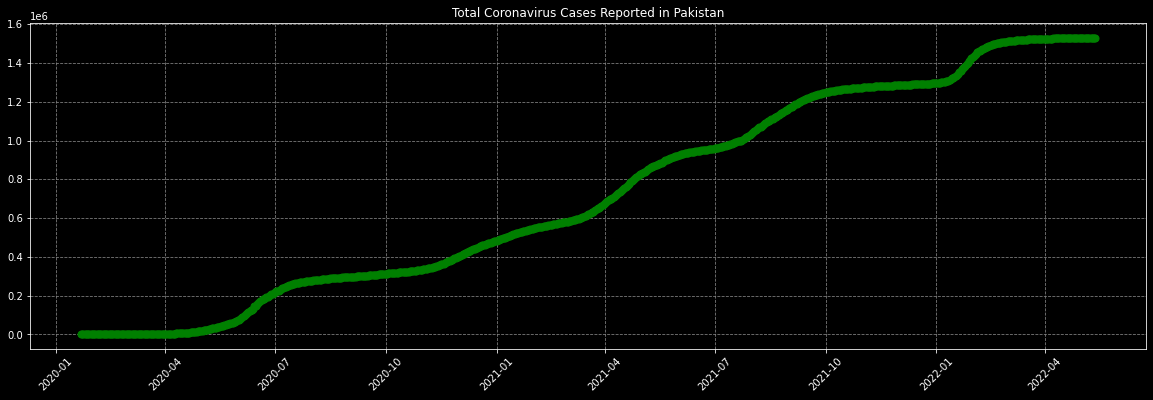

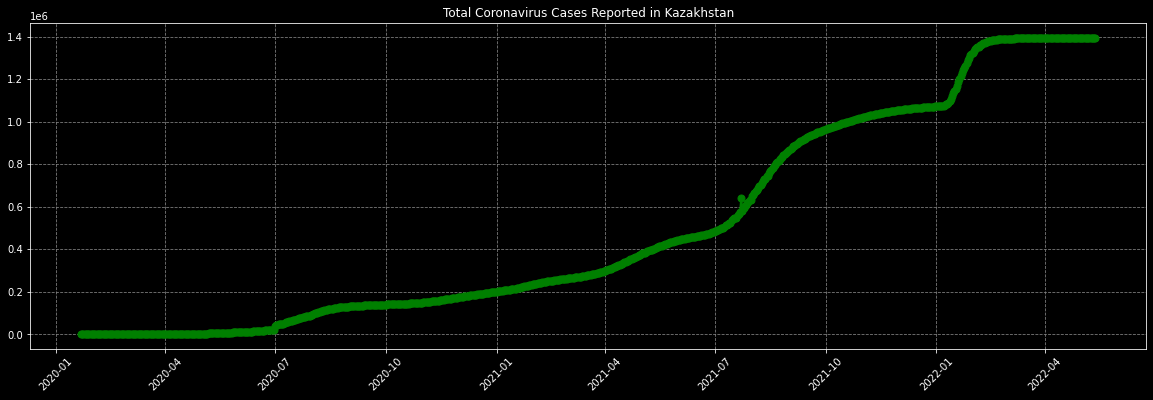

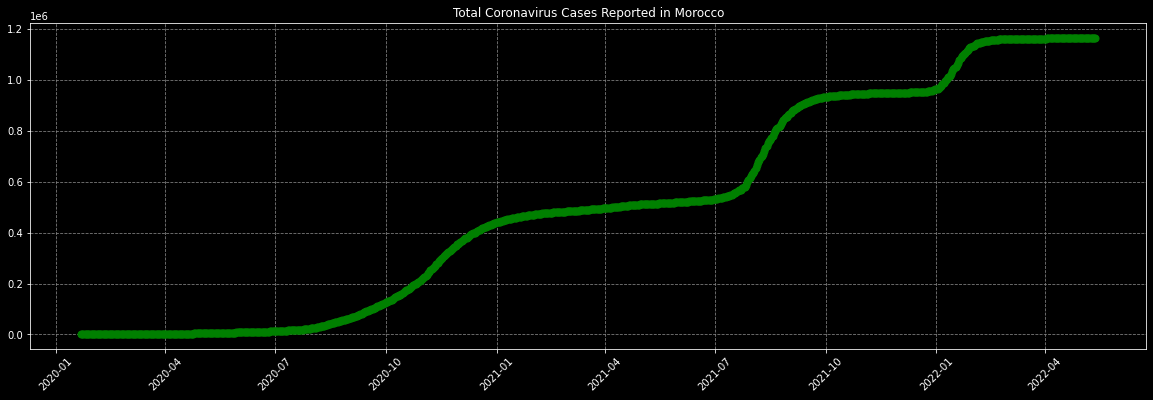

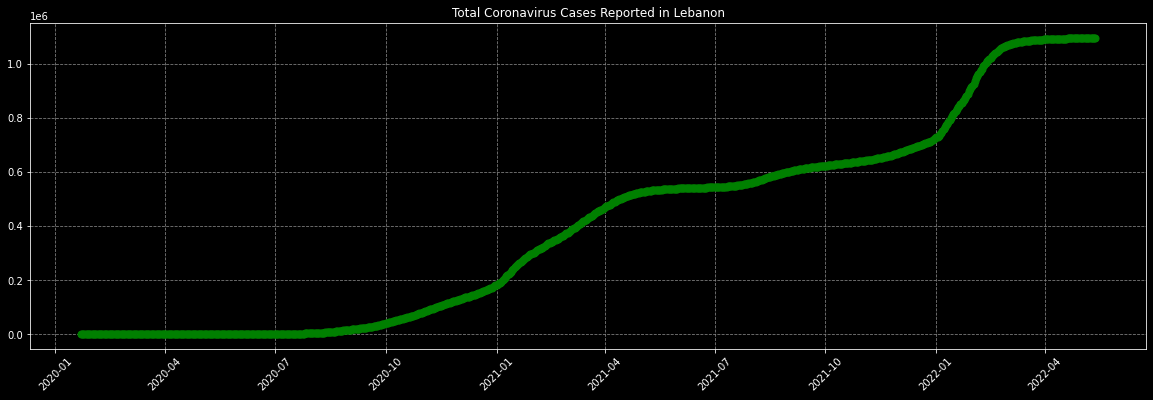

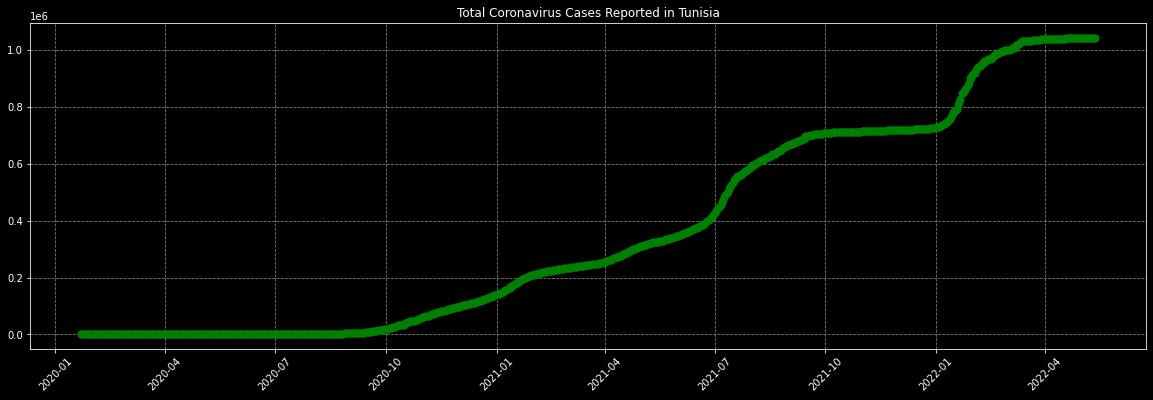

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in the countries that have flattened the curve.
def flattened_curve(country_list):
  for country in country_list: 
    country_cases = conf_df[conf_df['Country/Region'] == country].iloc[:, 4:].apply(sum, axis=0)
    country_cases.index = pd.to_datetime(country_cases.index)

    plt.figure(figsize=(20, 6))
    plt.title(f'Total Coronavirus Cases Reported in {country}')
    plt.plot(country_cases.index, country_cases, c='g', linewidth=2, marker='o', markersize=7)
    plt.xticks(rotation=45)
    plt.grid(True, 'major', linestyle='--', c='grey')
    plt.show()

flattened_curve(countries[:10])

We analysed only the confirmed cases. In the same way, you can analyse the deaths due to coronavirus data and number of people recovered from coronavirus data. The dataset structure for these two datasets is the same as that of the confirmed cases dataset.

In [ ]:
# Student Action: Run the code below.
# DataFrame for the total deaths due to coronavirus.
deaths_df = pd.read_csv(deaths_csv)
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/22  5/5/22  5/6/22  5/7/22  \
0        0        0        0        0  ...    7683    7684    7684    7684   
1        0        0        0        0  ...    3496    3496    3496    3496   
2        0        0        0        0  ...    6875    6875    6875    6875   
3        0        0        0        0  ...     153     153     153     153   
4        0        0        0        0  ...    1900    1900    1900    1900   

   5/8/22  5/9/22  5/10/22  5/11/22  5/12/22  5/13/22  
0    7684    7685     7685     7686     7686     7686  
1    3497    3497     3497     3497     3497     3497  
2    6875    6875     6875     6875     6875     6875  
3     153     153      153      153      153      153  
4    1900    1900     1900     1900     1900     1900  

[5 rows x 847 columns]

In [ ]:
# Student Action: Run the code below.
# DataFrame for the total number of patients recovered from coronavirus.
rec_df = pd.read_csv(rec_csv)
rec_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/22  5/5/22  5/6/22  5/7/22  \
0        0        0        0        0  ...       0       0       0       0   
1        0        0        0        0  ...       0       0       0       0   
2        0        0        0        0  ...       0       0       0       0   
3        0        0        0        0  ...       0       0       0       0   
4        0        0        0        0  ...       0       0       0       0   

   5/8/22  5/9/22  5/10/22  5/11/22  5/12/22  5/13/22  
0       0       0        0        0        0        0  
1       0       0        0        0        0        0  
2       0       0        0        0        0        0  
3       0       0        0        0        0        0  
4       0       0        0        0        0        0  

[5 rows x 847 columns]

---
